In [1]:
import os

import pandas as pd


def load_spray_df(directory: str) -> pd.DataFrame:
    """Load the spray metadata from a directory tree."""
    data = []
    for match_id in os.listdir(directory):
        if not match_id.isnumeric():
            continue
        match_directory = os.path.join(directory, match_id)
        for map_id in os.listdir(match_directory):
            if not map_id.isnumeric():
                continue
            map_directory = os.path.join(match_directory, map_id)
            for player_id in os.listdir(map_directory):
                if not player_id.isnumeric():
                    continue
                player_directory = os.path.join(map_directory, player_id)
                for filename in os.listdir(player_directory):
                    if not filename.endswith(".npy"):
                        continue
                    data.append([match_id, map_id, player_id, filename])
    return pd.DataFrame(data, columns=["match_id", "map_id", "player_id", "filename"])


spray_directory = "res/sprays"
spray_df = load_spray_df(spray_directory)
spray_df

,match_id,map_id,player_id,filename
0,92834,0,76561198342718168,136.npy
1,92834,0,76561198342718168,137.npy
2,92834,0,76561198342718168,180.npy
3,92834,0,76561198342718168,143.npy
4,92834,0,76561198342718168,178.npy
...,...,...,...,...
10633,92884,0,76561197973140692,15.npy
10634,92884,0,76561197973140692,14.npy
10635,92884,0,76561198316706174,157.npy
10636,92884,0,76561198316706174,163.npy


In [2]:
print(len(spray_df.player_id.unique()), "unique players")

340 unique players


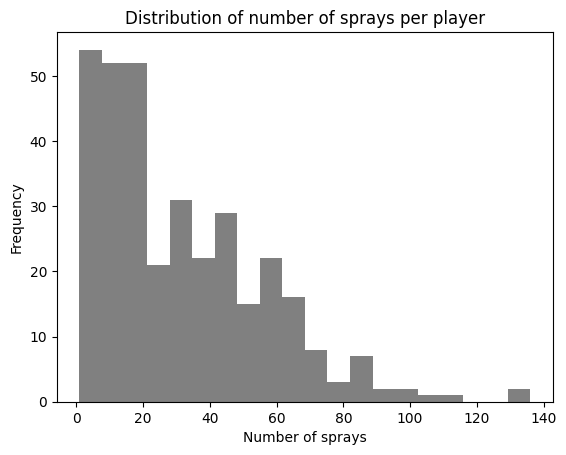

In [3]:
import matplotlib.pyplot as plt

spray_df.groupby("player_id").size() \
    .plot(kind="hist", bins=20, color="gray", xlabel="Number of sprays",
          title="Distribution of number of sprays per player")
plt.show()

In [4]:
player_ids = spray_df["player_id"].unique().tolist()
player_ids

['76561198342718168',
 '76561198408199043',
 '76561198184153575',
 '76561197975129851',
 '76561197995817501',
 '76561198080114546',
 '76561197981849043',
 '76561198036125584',
 '76561198222442504',
 '76561198044045107',
 '76561198155754447',
 '76561198014259134',
 '76561197977105184',
 '76561199009468655',
 '76561198134401925',
 '76561198316706174',
 '76561198016255205',
 '76561198283989223',
 '76561198001151695',
 '76561198972795853',
 '76561198258044780',
 '76561197981355847',
 '76561198062114681',
 '76561198156197967',
 '76561198052354821',
 '76561198350221098',
 '76561198070199303',
 '76561198161245944',
 '76561198139620346',
 '76561198164970560',
 '76561198118646644',
 '76561198067763828',
 '76561198113666193',
 '76561198058500492',
 '76561198063336407',
 '76561197989744167',
 '76561197978835160',
 '76561197973140692',
 '76561198336814871',
 '76561198162408395',
 '76561198095896540',
 '76561198307734468',
 '76561198339361458',
 '76561198809462276',
 '76561198029235071',
 '76561198

In [30]:
spray_df["player_id"].unique()[spray_df.groupby("player_id").size() > 100]

array(['76561198067763828', '76561198050250233', '76561198173539842',
       '76561198034202275'], dtype=object)

In [6]:
test_player_id = "76561197978835160"

In [7]:
import numpy as np


def load_spray_array(row: pd.Series) -> np.ndarray:
    """Given an index into the spray DataFrame, load a spray."""
    filename = f"{row.match_id}/{row.map_id}/{row.player_id}/{row.filename}"
    path = os.path.join(spray_directory, filename)
    array = np.load(path)
    return array


def fit_gaussian_parameters(player_id: str):
    rows = spray_df[spray_df["player_id"] == player_id]
    sprays = rows.apply(lambda row: load_spray_array(row), axis=1).reset_index(drop=True)

    samples = {"pitch": {}, "yaw": {}}  # fit a gaussian distribution to pitch/yaw of each bullet
    for spray in sprays:
        for i, (pitch, yaw) in enumerate(zip(spray[1:, 0], spray[1:, 1]), start=1):
            samples["pitch"][i] = samples["pitch"].get(i, []) + [pitch]
            samples["yaw"][i] = samples["yaw"].get(i, []) + [yaw]

    gaussian_parameters = {"pitch": {}, "yaw": {}}
    for feature in ["pitch", "yaw"]:
        for i in samples[feature].keys():
            gaussian_parameters[feature][i] = {
                "mean": np.mean(samples[feature][i]),
                "std": np.std(samples[feature][i]),
            }

    return gaussian_parameters, samples


test_parameters, test_samples = fit_gaussian_parameters(test_player_id)
test_parameters, test_samples

({'pitch': {1: {'mean': np.float32(0.53178847), 'std': np.float32(0.37166363)},
   2: {'mean': np.float32(1.7223206), 'std': np.float32(0.67511725)},
   3: {'mean': np.float32(3.230186), 'std': np.float32(0.89325905)},
   4: {'mean': np.float32(4.93984), 'std': np.float32(1.0289019)},
   5: {'mean': np.float32(6.445976), 'std': np.float32(1.0122579)},
   6: {'mean': np.float32(7.9670815), 'std': np.float32(1.4139323)},
   7: {'mean': np.float32(9.079125), 'std': np.float32(1.4058858)},
   8: {'mean': np.float32(8.80271), 'std': np.float32(1.21016)},
   9: {'mean': np.float32(8.43482), 'std': np.float32(0.89268476)},
   10: {'mean': np.float32(8.272018), 'std': np.float32(1.4178818)},
   11: {'mean': np.float32(6.137909), 'std': np.float32(0.0)},
   12: {'mean': np.float32(6.137909), 'std': np.float32(0.0)},
   13: {'mean': np.float32(5.8739014), 'std': np.float32(0.0)},
   14: {'mean': np.float32(5.8739014), 'std': np.float32(0.0)},
   15: {'mean': np.float32(5.8739014), 'std': np.floa

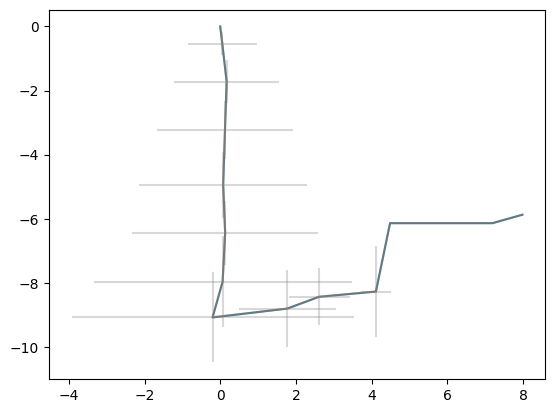

In [8]:
def plot_parameters(parameters: dict):
    bullet_indices = parameters["pitch"].keys()

    xs = [0] + [parameters["yaw"][i]["mean"] for i in bullet_indices]
    ys = [0] + [-parameters["pitch"][i]["mean"] for i in bullet_indices]
    dev_x = [0] + [parameters["yaw"][i]["std"] for i in bullet_indices]
    dev_y = [0] + [parameters["pitch"][i]["std"] for i in bullet_indices]

    plt.plot(xs, ys)
    plt.errorbar(xs, ys, xerr=dev_x, yerr=dev_y, ecolor="gray", alpha=0.3)
    plt.show()


plot_parameters(test_parameters)

In [9]:
from sklearn.model_selection import train_test_split

player_ids_train, player_ids_test = train_test_split(player_ids, test_size=0.15, random_state=410)

print(len(player_ids_train), len(player_ids_test))

289 51


In [18]:
import torch


def collect_samples(player_ids: list):
    samples = []
    for player_id in player_ids:
        tensor = []
        gaussian_parameters, _ = fit_gaussian_parameters(player_id)
        for i in gaussian_parameters["pitch"].keys():
            tensor.append([
                gaussian_parameters["pitch"][i]["mean"],
                gaussian_parameters["pitch"][i]["std"],
                gaussian_parameters["yaw"][i]["mean"],
                gaussian_parameters["yaw"][i]["std"]
            ])
        samples.append(torch.tensor(tensor))
    return samples


tensors = collect_samples(player_ids_train)
print(len(tensors))

289


In [24]:
tensors[5]

tensor([[ 5.9182e-01,  5.7770e-01, -3.9011e-02,  7.4089e-01],
        [ 1.6186e+00,  7.8272e-01, -1.0706e-01,  1.3824e+00],
        [ 3.2175e+00,  1.0596e+00, -1.3400e-01,  1.7955e+00],
        [ 4.7650e+00,  1.1315e+00, -1.2870e-01,  2.0430e+00],
        [ 6.1395e+00,  1.2594e+00, -1.4969e-01,  2.6581e+00],
        [ 7.3993e+00,  1.4625e+00, -3.3181e-02,  3.1847e+00],
        [ 8.7623e+00,  1.1809e+00, -5.2553e-02,  1.1504e+00],
        [ 8.7935e+00,  1.0245e+00,  5.5330e-03,  1.7409e+00],
        [ 9.3712e+00,  1.0174e+00,  1.7676e-01,  1.2334e+00],
        [ 9.7169e+00,  9.0837e-01,  1.4536e+00,  1.4670e+00],
        [ 9.8274e+00,  9.7546e-01,  2.2588e+00,  1.7524e+00],
        [ 9.7792e+00,  1.0992e+00,  2.6986e+00,  1.7413e+00],
        [ 9.8664e+00,  1.0954e+00,  2.3640e+00,  2.0870e+00],
        [ 1.0435e+01,  7.9631e-01,  2.3661e+00,  1.4396e+00],
        [ 1.0192e+01,  5.8897e-01,  2.9697e-01,  4.8512e-01],
        [ 1.0261e+01,  6.4837e-01, -5.2976e-01,  2.3278e-01],
        